In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "data/combined_thin.csv"
dfnew = pd.read_csv(file,low_memory=False)
lstproptypes = ['Apartment', 'House', 'Condominium', 'Townhouse','Loft']

In [3]:
df2=dfnew.loc[dfnew['review_scores_rating']>0]
df=df2.loc[df2['property_type'].isin(lstproptypes)]

In [4]:
lst=[
    'Accessible', 'BBQ grill', 'Baby friendly','Bathtub',
    'Beachfront', 'Coffee maker','Elevator', 'Extra pillows and blankets',
    'Game console','Garden or backyard','Heating', 'Indoor fireplace',
    'Laptop friendly workspace','Private bathroom', 'Private entrance','Smoking allowed']

In [5]:
real_price = []
for x in df["log_price"]:
    price = np.exp(x)
    real_price.append(price)
price_series = pd.Series(real_price)

df["cost"] = price_series

C:\Users\jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
df1 = df[['property_type','cost']].groupby('property_type').mean()
df1b=df1.rename(columns={'cost': 'AverageCost'})

In [7]:
for each in lst:
    df2 = df.loc[df[each]>0]
    df2b =df2[['property_type','cost']].groupby('property_type').mean()
    df1b=df1b.join(df2b.rename(columns={'cost': each}), on='property_type',how='left')

In [8]:
df_chart = df1b.reset_index()

In [9]:
df_chart.head()

,property_type,AverageCost,Accessible,BBQ grill,Baby friendly,Bathtub,Beachfront,Coffee maker,Elevator,Extra pillows and blankets,Game console,Garden or backyard,Heating,Indoor fireplace,Laptop friendly workspace,Private bathroom,Private entrance,Smoking allowed
0,Apartment,146.652191,146.419900,153.074561,146.115144,146.452366,147.625,147.126309,147.590959,147.328869,149.682292,139.573487,146.515626,148.571357,147.294457,142.1,146.299349,148.054010
1,Condominium,147.743290,151.278075,109.785714,194.184615,135.274648,NaN,158.600000,150.166983,181.655914,117.590909,113.535714,148.490323,153.817694,147.571693,103.4,156.428571,181.707317
2,House,149.160486,146.335341,139.975207,156.815678,150.096539,107.875,143.295739,148.800000,137.779841,154.767123,134.509294,149.077682,146.381168,149.505672,116.0,147.508759,145.836158
3,Loft,149.560544,150.532787,719.500000,118.937500,187.871795,NaN,145.080000,149.108025,128.380952,113.166667,505.000000,146.281065,140.790000,143.523529,192.0,119.178571,182.981132
4,Townhouse,146.778807,129.958333,134.842105,151.596774,159.062500,NaN,148.844156,117.666667,127.695652,142.833333,141.418605,146.716129,144.241107,140.842837,63.0,135.844086,161.176471


In [13]:
lst1=['Accessible', 'BBQ grill', 'Baby friendly','Bathtub']
lst2=['Beachfront', 'Coffee maker','Elevator', 'Extra pillows and blankets' ]
lst3=['Game console','Garden or backyard','Heating', 'Indoor fireplace']
lst4=['Laptop friendly workspace','Private bathroom', 'Private entrance','Smoking allowed']

In [21]:
lstcolors=["lightskyblue","tan","plum","lightgreen","lightcoral","gold"]#["lightblue","green","lightskyblue","lightcoral","orange","red","purple","pink","yellowgreen"]
x = df_chart.index
y = df_chart['AverageCost']
ylabel = 'Average Cost'
xlabel = 'Property Type'
ymin =df_chart['AverageCost'].min()-(df_chart['AverageCost'].min()*.02)
ymax = 800
xmin=-0.5
xmax=4.5
w=.17
width = 0.15
width1 = width
alpha =.99
alpha1=.90
lsz = 12
wsz = 8
title = 'Average Overal Cost vs Average Cost with Amenities by Property type'

C:\Users\jeff\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


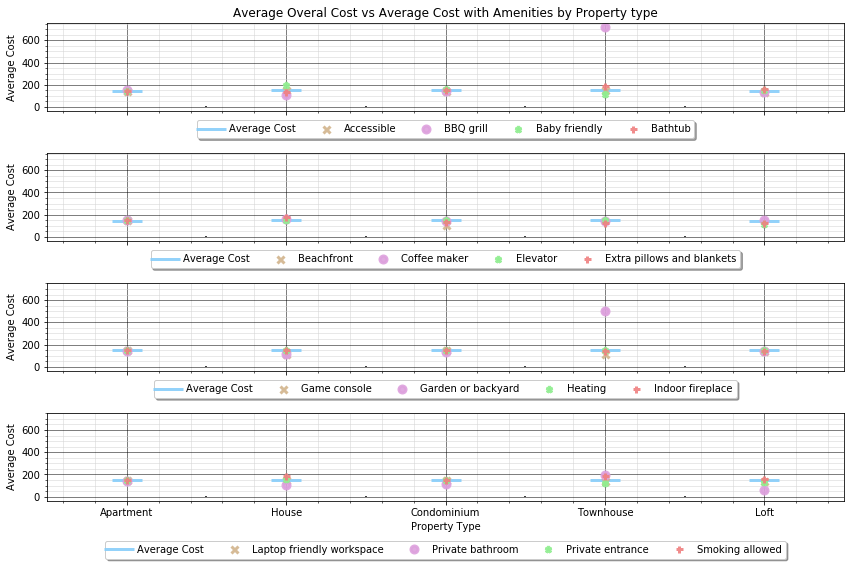

In [23]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True,figsize=(lsz,wsz))

ax1.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax1.plot(x, df_chart[lst1[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax1.plot(x, df_chart[lst1[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax1.plot(x, df_chart[lst1[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax1.plot(x, df_chart[lst1[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)

ax2.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax2.plot(x, df_chart[lst2[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax2.plot(x, df_chart[lst2[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax2.plot(x, df_chart[lst2[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax2.plot(x, df_chart[lst2[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)

ax3.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax3.plot(x, df_chart[lst3[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax3.plot(x, df_chart[lst3[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax3.plot(x, df_chart[lst3[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax3.plot(x, df_chart[lst3[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)

ax4.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax4.plot(x, df_chart[lst4[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax4.plot(x, df_chart[lst4[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax4.plot(x, df_chart[lst4[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax4.plot(x, df_chart[lst4[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)


#plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)

ax1.legend([ylabel,lst1[0],lst1[1],lst1[2],lst1[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax2.legend([ylabel,lst2[0],lst2[1],lst2[2],lst2[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax3.legend([ylabel,lst3[0],lst3[1],lst3[2],lst3[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax4.legend([ylabel,lst4[0],lst4[1],lst4[2],lst4[3]],loc='upper center', bbox_to_anchor=(0.5, -0.4),fancybox=True, shadow=True, ncol=5)


ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels((['Apartment', 'House', 'Condominium', 'Townhouse','Loft']))

ax1.set_title(title)
ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)
ax3.set_ylabel(ylabel)
ax4.set_ylabel(ylabel)

ax4.set_xlabel(xlabel)

ax1.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax2.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax3.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax4.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax1.minorticks_on()
ax1.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax1.grid(which='major',  linewidth='0.5', color='black')
ax1.set_axisbelow(True)

ax2.minorticks_on()
ax2.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax2.grid(which='major',  linewidth='0.5', color='black')
ax2.set_axisbelow(True)

ax3.minorticks_on()
ax3.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax3.grid(which='major',  linewidth='0.5', color='black')
ax3.set_axisbelow(True)

ax4.minorticks_on()
ax4.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax4.grid(which='major',  linewidth='0.5', color='black')
ax4.set_axisbelow(True)

fig.tight_layout()
plt.savefig("Images/Chart3_final.png")
fig.show()

In [ ]:
color = 'yellow'
plt.figure(figsize=(12,3))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.2,  color=color, edgecolor = "black",linewidth=1)
for each in lst1:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=30)
#plt.tick_params(axis='x',rotation=90)
plt.ylim(90,98)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart1.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst2:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart2.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst3:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart3.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst4:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart4.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst5:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart5.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst6:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart6.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst7:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart7.png")
plt.show()


In [ ]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst8:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart8.png")
plt.show()
